In [1]:
# 오류 메시지 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
#데이터 불러오기
import pandas as pd
pcos=pd.read_csv("../Data/pcos_remove.csv")
pcos.head(3)

,PCOS,Age,Weight,Height,BMI,Blood Type,Pulse rate,Cycle length,Marraige Status,Pregnant,...,Waist:Hip Ratio,Weight gain,hair growth,Skin darkening,Hair loss,Pimples,Fast food,Reg.Exercise,BP_Systolic,BP_Diastolic
0,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,5.0,7.0,0.0,...,0.833333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,110.0,80.0
1,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,5.0,11.0,1.0,...,0.842105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,70.0
2,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,5.0,10.0,1.0,...,0.900000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,120.0,80.0


# 타겟 컬럼 분포 확인

In [3]:
df_value_counts = pcos['PCOS'].value_counts()
df_value_counts

0.0    360
1.0    177
Name: PCOS, dtype: int64

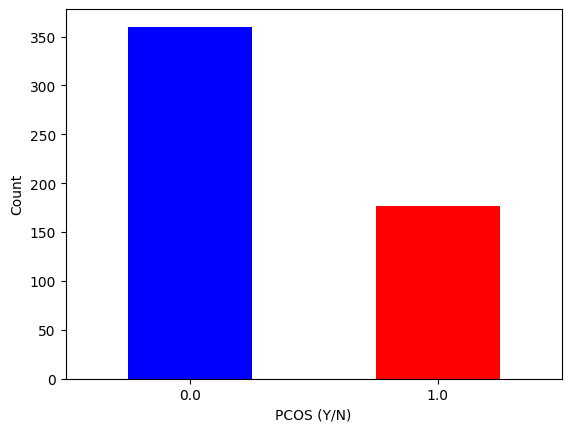

In [4]:
import matplotlib.pyplot as plt
df_value_counts.plot(
    kind='bar',
    rot=0,
    color = ['blue','red']
)
plt.xlabel("PCOS (Y/N)")
plt.ylabel("Count")
plt.show()

# 0과 1의 데이터 숫자를 맞춰줘야한다.

3개의 가장 중요한 Feature Column(hair growth, Skin darkening, Weight gain ) 에서 360 - 177 = 183개를 제거 해줘야 하므로 각 칼럼당 61개의 데이터를 제거하기로 결정

In [5]:
pcos_0 = pcos[pcos['PCOS']==0]
pcos_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 535
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PCOS             360 non-null    float64
 1   Age              360 non-null    float64
 2   Weight           360 non-null    float64
 3   Height           360 non-null    float64
 4   BMI              360 non-null    float64
 5   Blood Type       360 non-null    float64
 6   Pulse rate       360 non-null    float64
 7   Cycle length     360 non-null    float64
 8   Marraige Status  360 non-null    float64
 9   Pregnant         360 non-null    float64
 10  aborptions       360 non-null    float64
 11  Hip              360 non-null    float64
 12  Waist            360 non-null    float64
 13  Waist:Hip Ratio  360 non-null    float64
 14  Weight gain      360 non-null    float64
 15  hair growth      360 non-null    float64
 16  Skin darkening   360 non-null    float64
 17  Hair loss       

In [6]:
pcos_1 = pcos[pcos['PCOS']==1]
pcos_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 2 to 536
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PCOS             177 non-null    float64
 1   Age              177 non-null    float64
 2   Weight           177 non-null    float64
 3   Height           177 non-null    float64
 4   BMI              177 non-null    float64
 5   Blood Type       177 non-null    float64
 6   Pulse rate       177 non-null    float64
 7   Cycle length     177 non-null    float64
 8   Marraige Status  177 non-null    float64
 9   Pregnant         177 non-null    float64
 10  aborptions       177 non-null    float64
 11  Hip              177 non-null    float64
 12  Waist            177 non-null    float64
 13  Waist:Hip Ratio  177 non-null    float64
 14  Weight gain      177 non-null    float64
 15  hair growth      177 non-null    float64
 16  Skin darkening   177 non-null    float64
 17  Hair loss       

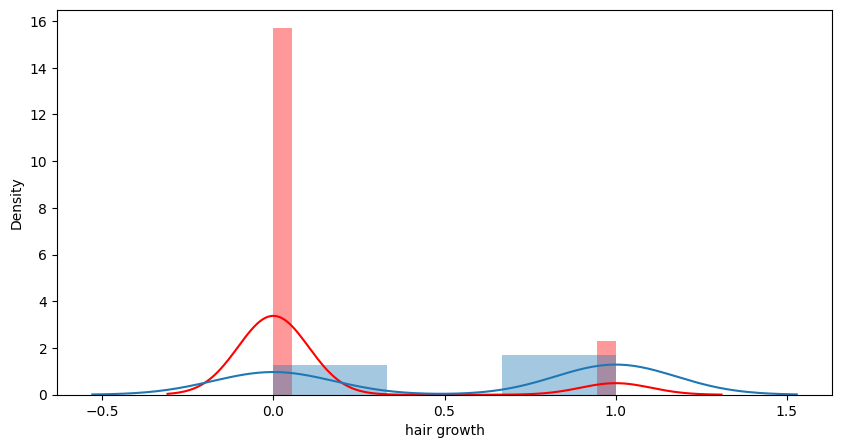

In [7]:
import seaborn  as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))

sns.distplot(pcos_0['hair growth'],color='red' )
sns.distplot(pcos_1['hair growth'])


plt.show()

In [8]:
pcos_0[pcos_0['hair growth']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 0 to 535
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PCOS             314 non-null    float64
 1   Age              314 non-null    float64
 2   Weight           314 non-null    float64
 3   Height           314 non-null    float64
 4   BMI              314 non-null    float64
 5   Blood Type       314 non-null    float64
 6   Pulse rate       314 non-null    float64
 7   Cycle length     314 non-null    float64
 8   Marraige Status  314 non-null    float64
 9   Pregnant         314 non-null    float64
 10  aborptions       314 non-null    float64
 11  Hip              314 non-null    float64
 12  Waist            314 non-null    float64
 13  Waist:Hip Ratio  314 non-null    float64
 14  Weight gain      314 non-null    float64
 15  hair growth      314 non-null    float64
 16  Skin darkening   314 non-null    float64
 17  Hair loss       

In [9]:
import random
pcos_0_h = pd.concat([pcos_0[pcos_0['hair growth']==1],pcos_0[pcos_0['hair growth']==0].sample(n=253, replace=False)])  #replace=False는 중복이 되지 않도록.
pcos_0_h

,PCOS,Age,Weight,Height,BMI,Blood Type,Pulse rate,Cycle length,Marraige Status,Pregnant,...,Waist:Hip Ratio,Weight gain,hair growth,Skin darkening,Hair loss,Pimples,Fast food,Reg.Exercise,BP_Systolic,BP_Diastolic
106,0.0,28.0,60.0,160.0,23.437500,15.0,72.0,7.0,3.0,0.0,...,0.842105,1.0,1.0,1.0,1.0,1.0,0.0,0.0,120.0,80.0
109,0.0,34.0,80.0,160.0,31.250000,15.0,74.0,11.0,19.0,1.0,...,0.880952,0.0,1.0,1.0,0.0,0.0,1.0,1.0,120.0,70.0
111,0.0,26.0,75.0,170.0,25.951557,15.0,72.0,2.0,3.0,1.0,...,0.850000,0.0,1.0,1.0,1.0,0.0,1.0,1.0,120.0,80.0
116,0.0,35.0,63.0,155.0,26.222685,15.0,80.0,5.0,14.0,0.0,...,0.833333,0.0,1.0,0.0,0.0,1.0,1.0,1.0,110.0,70.0
121,0.0,33.0,48.0,148.0,21.913806,16.0,70.0,5.0,12.0,0.0,...,0.789474,0.0,1.0,0.0,0.0,0.0,0.0,0.0,110.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,0.0,20.0,52.0,150.0,23.111111,15.0,72.0,6.0,3.0,0.0,...,0.941176,0.0,0.0,0.0,1.0,1.0,1.0,0.0,110.0,70.0
18,0.0,31.0,52.4,159.0,20.727028,17.0,72.0,5.0,7.0,0.0,...,0.891892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,80.0
318,0.0,28.0,61.0,150.0,27.100000,11.0,72.0,6.0,6.5,0.0,...,0.897436,1.0,0.0,0.0,0.0,1.0,1.0,0.0,110.0,80.0
322,0.0,45.0,54.0,152.0,23.400000,13.0,72.0,6.0,23.0,0.0,...,0.921053,0.0,0.0,0.0,1.0,1.0,0.0,1.0,120.0,80.0


# 제거 후 다시 그래프 찍어보기

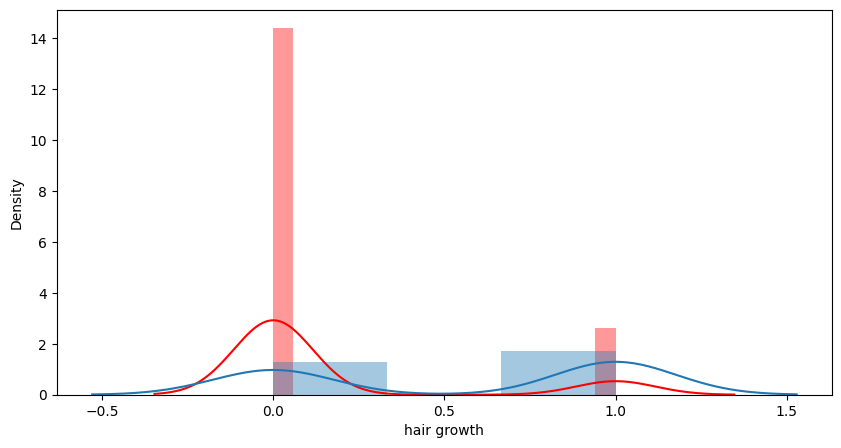

In [10]:
fig = plt.figure(figsize=(10,5))

sns.distplot(pcos_0_h['hair growth'],color='red' )
sns.distplot(pcos_1['hair growth'])


plt.show()

# Skin darkening

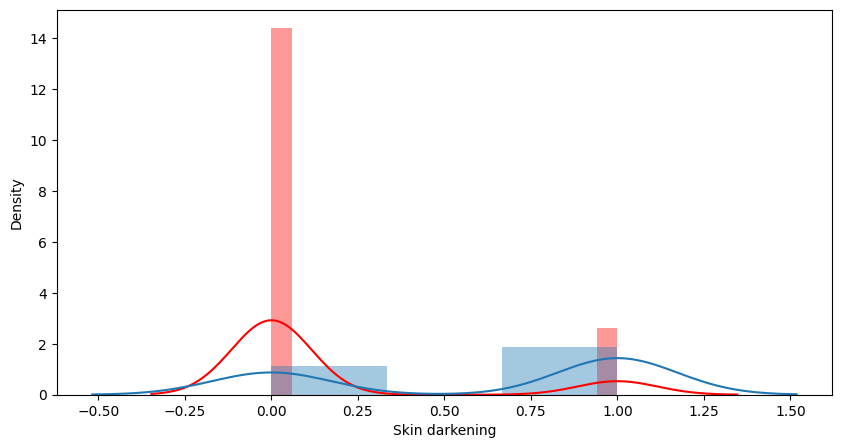

In [11]:
fig = plt.figure(figsize=(10,5))
sns.distplot(pcos_0_h['Skin darkening'],color='red')
sns.distplot(pcos_1['Skin darkening'])

plt.show()

In [12]:
pcos_0_h[pcos_0_h['Skin darkening']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 106 to 329
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PCOS             46 non-null     float64
 1   Age              46 non-null     float64
 2   Weight           46 non-null     float64
 3   Height           46 non-null     float64
 4   BMI              46 non-null     float64
 5   Blood Type       46 non-null     float64
 6   Pulse rate       46 non-null     float64
 7   Cycle length     46 non-null     float64
 8   Marraige Status  46 non-null     float64
 9   Pregnant         46 non-null     float64
 10  aborptions       46 non-null     float64
 11  Hip              46 non-null     float64
 12  Waist            46 non-null     float64
 13  Waist:Hip Ratio  46 non-null     float64
 14  Weight gain      46 non-null     float64
 15  hair growth      46 non-null     float64
 16  Skin darkening   46 non-null     float64
 17  Hair loss      

In [13]:
pcos_0_h[pcos_0_h['Skin darkening']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253 entries, 116 to 470
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PCOS             253 non-null    float64
 1   Age              253 non-null    float64
 2   Weight           253 non-null    float64
 3   Height           253 non-null    float64
 4   BMI              253 non-null    float64
 5   Blood Type       253 non-null    float64
 6   Pulse rate       253 non-null    float64
 7   Cycle length     253 non-null    float64
 8   Marraige Status  253 non-null    float64
 9   Pregnant         253 non-null    float64
 10  aborptions       253 non-null    float64
 11  Hip              253 non-null    float64
 12  Waist            253 non-null    float64
 13  Waist:Hip Ratio  253 non-null    float64
 14  Weight gain      253 non-null    float64
 15  hair growth      253 non-null    float64
 16  Skin darkening   253 non-null    float64
 17  Hair loss     

In [14]:
pcos_0_h_s = pd.concat([pcos_0_h[pcos_0_h['Skin darkening']==1],pcos_0_h[pcos_0_h['Skin darkening']==0].sample(n=192, replace=False)])  #replace=False는 중복이 되지 않도록.
pcos_0_h_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 106 to 134
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PCOS             238 non-null    float64
 1   Age              238 non-null    float64
 2   Weight           238 non-null    float64
 3   Height           238 non-null    float64
 4   BMI              238 non-null    float64
 5   Blood Type       238 non-null    float64
 6   Pulse rate       238 non-null    float64
 7   Cycle length     238 non-null    float64
 8   Marraige Status  238 non-null    float64
 9   Pregnant         238 non-null    float64
 10  aborptions       238 non-null    float64
 11  Hip              238 non-null    float64
 12  Waist            238 non-null    float64
 13  Waist:Hip Ratio  238 non-null    float64
 14  Weight gain      238 non-null    float64
 15  hair growth      238 non-null    float64
 16  Skin darkening   238 non-null    float64
 17  Hair loss     

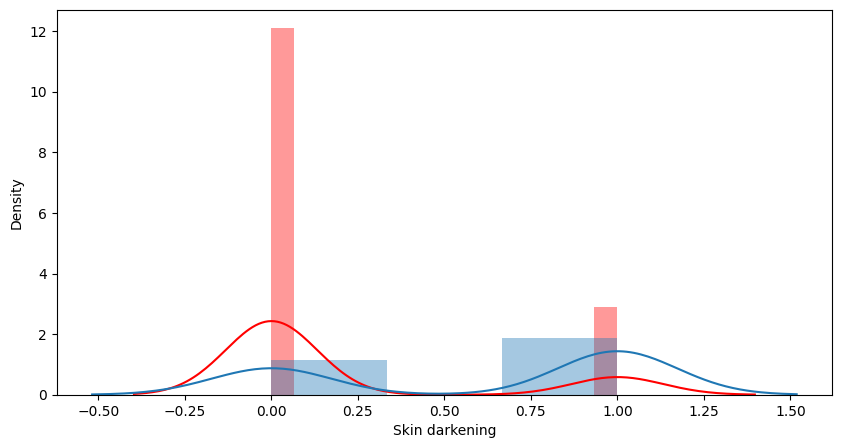

In [15]:
fig = plt.figure(figsize=(10,5))
sns.distplot(pcos_0_h_s['Skin darkening'],color='red')
sns.distplot(pcos_1['Skin darkening'])

plt.show()

# 마지막으로 weight gain 조절

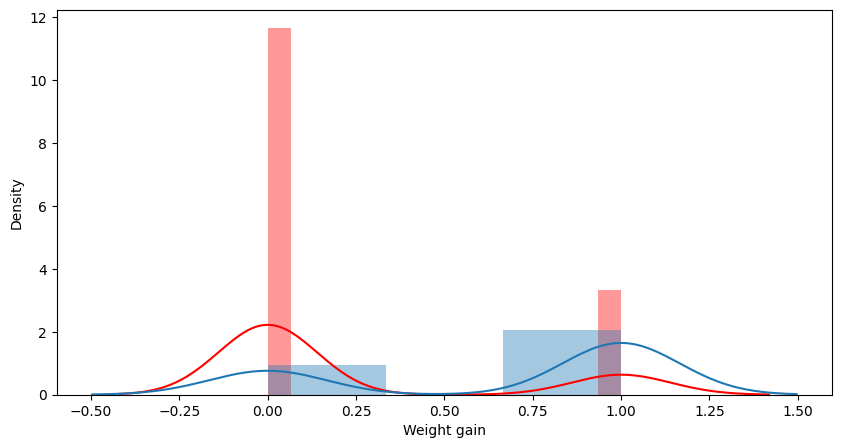

In [16]:
fig = plt.figure(figsize=(10,5))
sns.distplot(pcos_0_h_s['Weight gain'],color='red')
sns.distplot(pcos_1['Weight gain'])

plt.show()

In [17]:
pcos_0_h_s[pcos_0_h_s['Weight gain']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 106 to 339
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PCOS             53 non-null     float64
 1   Age              53 non-null     float64
 2   Weight           53 non-null     float64
 3   Height           53 non-null     float64
 4   BMI              53 non-null     float64
 5   Blood Type       53 non-null     float64
 6   Pulse rate       53 non-null     float64
 7   Cycle length     53 non-null     float64
 8   Marraige Status  53 non-null     float64
 9   Pregnant         53 non-null     float64
 10  aborptions       53 non-null     float64
 11  Hip              53 non-null     float64
 12  Waist            53 non-null     float64
 13  Waist:Hip Ratio  53 non-null     float64
 14  Weight gain      53 non-null     float64
 15  hair growth      53 non-null     float64
 16  Skin darkening   53 non-null     float64
 17  Hair loss      

In [18]:
pcos_0_h_s[pcos_0_h_s['Weight gain']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 109 to 134
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PCOS             185 non-null    float64
 1   Age              185 non-null    float64
 2   Weight           185 non-null    float64
 3   Height           185 non-null    float64
 4   BMI              185 non-null    float64
 5   Blood Type       185 non-null    float64
 6   Pulse rate       185 non-null    float64
 7   Cycle length     185 non-null    float64
 8   Marraige Status  185 non-null    float64
 9   Pregnant         185 non-null    float64
 10  aborptions       185 non-null    float64
 11  Hip              185 non-null    float64
 12  Waist            185 non-null    float64
 13  Waist:Hip Ratio  185 non-null    float64
 14  Weight gain      185 non-null    float64
 15  hair growth      185 non-null    float64
 16  Skin darkening   185 non-null    float64
 17  Hair loss     

In [19]:
pcos_0_h_s_w = pd.concat([pcos_0_h_s[pcos_0_h_s['Weight gain']==1],pcos_0_h_s[pcos_0_h_s['Weight gain']==0].sample(n=118, replace=False)])  #replace=False는 중복이 되지 않도록.
pcos_0_h_s_w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 106 to 298
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PCOS             171 non-null    float64
 1   Age              171 non-null    float64
 2   Weight           171 non-null    float64
 3   Height           171 non-null    float64
 4   BMI              171 non-null    float64
 5   Blood Type       171 non-null    float64
 6   Pulse rate       171 non-null    float64
 7   Cycle length     171 non-null    float64
 8   Marraige Status  171 non-null    float64
 9   Pregnant         171 non-null    float64
 10  aborptions       171 non-null    float64
 11  Hip              171 non-null    float64
 12  Waist            171 non-null    float64
 13  Waist:Hip Ratio  171 non-null    float64
 14  Weight gain      171 non-null    float64
 15  hair growth      171 non-null    float64
 16  Skin darkening   171 non-null    float64
 17  Hair loss     

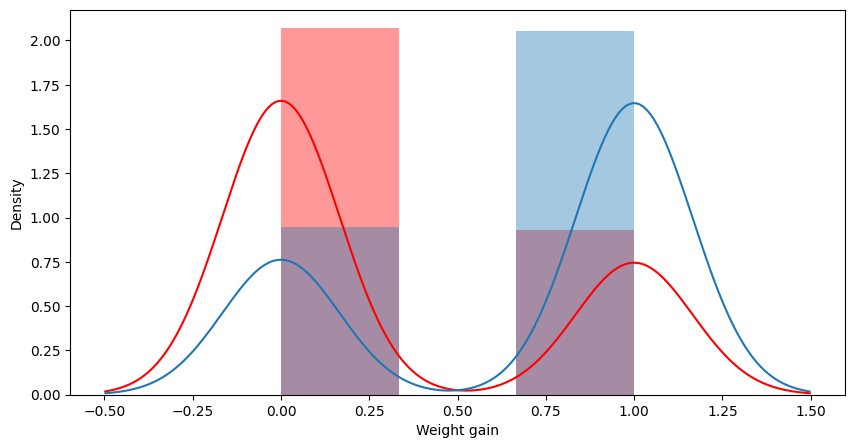

In [20]:
fig = plt.figure(figsize=(10,5))
sns.distplot(pcos_0_h_s_w['Weight gain'],color='red')
sns.distplot(pcos_1['Weight gain'])

plt.show()

In [21]:
pcos_0_h_s_w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 106 to 298
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PCOS             171 non-null    float64
 1   Age              171 non-null    float64
 2   Weight           171 non-null    float64
 3   Height           171 non-null    float64
 4   BMI              171 non-null    float64
 5   Blood Type       171 non-null    float64
 6   Pulse rate       171 non-null    float64
 7   Cycle length     171 non-null    float64
 8   Marraige Status  171 non-null    float64
 9   Pregnant         171 non-null    float64
 10  aborptions       171 non-null    float64
 11  Hip              171 non-null    float64
 12  Waist            171 non-null    float64
 13  Waist:Hip Ratio  171 non-null    float64
 14  Weight gain      171 non-null    float64
 15  hair growth      171 non-null    float64
 16  Skin darkening   171 non-null    float64
 17  Hair loss     

In [22]:
pcos_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 2 to 536
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PCOS             177 non-null    float64
 1   Age              177 non-null    float64
 2   Weight           177 non-null    float64
 3   Height           177 non-null    float64
 4   BMI              177 non-null    float64
 5   Blood Type       177 non-null    float64
 6   Pulse rate       177 non-null    float64
 7   Cycle length     177 non-null    float64
 8   Marraige Status  177 non-null    float64
 9   Pregnant         177 non-null    float64
 10  aborptions       177 non-null    float64
 11  Hip              177 non-null    float64
 12  Waist            177 non-null    float64
 13  Waist:Hip Ratio  177 non-null    float64
 14  Weight gain      177 non-null    float64
 15  hair growth      177 non-null    float64
 16  Skin darkening   177 non-null    float64
 17  Hair loss       

In [23]:
pcos_final = pd.concat([pcos_0_h_s_w, pcos_1])
pcos_final

,PCOS,Age,Weight,Height,BMI,Blood Type,Pulse rate,Cycle length,Marraige Status,Pregnant,...,Waist:Hip Ratio,Weight gain,hair growth,Skin darkening,Hair loss,Pimples,Fast food,Reg.Exercise,BP_Systolic,BP_Diastolic
106,0.0,28.0,60.0,160.000,23.437500,15.0,72.0,7.0,3.0,0.0,...,0.842105,1.0,1.0,1.0,1.0,1.0,0.0,0.0,120.0,80.0
200,0.0,28.0,80.0,163.000,30.110279,15.0,74.0,6.0,6.0,1.0,...,0.900000,1.0,1.0,1.0,1.0,1.0,1.0,0.0,120.0,80.0
267,0.0,30.0,55.1,167.640,19.606329,11.0,72.0,5.0,8.5,0.0,...,0.941176,1.0,1.0,1.0,1.0,1.0,1.0,0.0,110.0,80.0
276,0.0,26.0,54.0,150.000,24.000000,11.0,72.0,3.0,5.0,0.0,...,0.944444,1.0,1.0,1.0,1.0,0.0,1.0,0.0,120.0,70.0
286,0.0,27.0,65.0,162.000,24.767566,15.0,72.0,5.0,3.5,0.0,...,0.947368,1.0,1.0,1.0,1.0,1.0,0.0,0.0,110.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,1.0,27.0,50.0,168.000,17.700000,13.0,72.0,2.0,7.0,0.0,...,0.961538,0.0,1.0,0.0,0.0,1.0,0.0,0.0,120.0,70.0
519,1.0,36.0,60.0,150.000,26.700000,15.0,72.0,7.0,8.0,0.0,...,0.952381,1.0,0.0,0.0,0.0,1.0,0.0,0.0,110.0,80.0
520,1.0,27.0,70.0,170.688,24.000000,13.0,72.0,5.0,4.0,1.0,...,0.954545,1.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,80.0
529,1.0,26.0,53.5,161.544,20.500000,14.0,70.0,7.0,3.0,0.0,...,0.928571,0.0,0.0,0.0,0.0,1.0,0.0,0.0,110.0,80.0


In [24]:
pcos_final.to_csv('../Data/pcos_sameYN.csv',index=None)